In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import locale
locale.setlocale(locale.LC_ALL, '')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})
mpl.rcParams.update({'mathtext.fontset':'dejavusans'})
mpl.rcParams['axes.formatter.use_locale'] = True
import re


In [35]:
Simbolos = {'Água':'s', 'Glicerol':'o', 'Sacarose':'<', 'Ureia':'>', '13BD':'v', 'DMSO':'^'}
def_markersize = 8
dict_nomes = {'13BD':'1,3BD',
             'Agua':'Água',
             'DMSO':'DMSO',
             'Glicerol':'Glicerina',
             'Sacarose':'Sacarose',
             'Ureia':'Ureia'}
simbolos_mpl = ['o', '<', '>', '^', 'v', 'd', '*', 'p', '+', 'h', 'D', 'D']
simbolos_conc = {conc:simb for conc, simb in zip(np.arange(5, 65, 5), simbolos_mpl)}
simbolos_conc[0] = 's'
simbolos_conc[1] = 's'

Cores = {'Água':'k', 'Glicerol':'#e67300', 'Sacarose':'#00b300', 
         'Ureia':'#ff0000', '13BD':'#0000ff', 'DMSO':'#bf00ff'}

# Índice de refração

In [24]:
indice_refrac = pd.read_excel(r'./dados experimentais/propriedades_aditivos.xlsx', sheet_name='n', header=2)
indice_refrac

,Água p,Água n,DMSO p,DMSO n,Ureia p,Ureia n,Glicerol p,Glicerol n,Sacarose p,Sacarose n,sucralose p,sucralose n,13BD p,13BD n
0,0.0,1.33303,0.0,1.3325,0.5,1.3337,0.5,1.3336,0.5,1.3337,5.0,1.33900,0.00000,1.3329
1,NaN,NaN,5.0,1.3390,1.0,1.3344,1.0,1.3342,1.0,1.3344,10.0,1.34667,35.62323,1.3755
2,NaN,NaN,10.0,1.3458,2.0,1.3358,2.0,1.3353,2.0,1.3359,20.0,1.36250,55.28863,1.3985
3,NaN,NaN,15.0,1.3527,3.0,1.3372,3.0,1.3365,3.0,1.3373,27.0,1.37500,68.09920,1.4119
4,NaN,NaN,20.0,1.3600,4.0,1.3387,4.0,1.3376,4.0,1.3388,NaN,NaN,77.19640,1.4203
5,NaN,NaN,25.0,1.3677,5.0,1.3401,5.0,1.3388,5.0,1.3403,NaN,NaN,80.29454,1.4230
6,NaN,NaN,30.0,1.3754,6.0,1.3416,6.0,1.3400,6.0,1.3418,NaN,NaN,88.74352,1.4305
7,NaN,NaN,35.0,1.3832,7.0,1.3431,7.0,1.3412,7.0,1.3433,NaN,NaN,92.07066,1.4334
8,NaN,NaN,40.0,1.3913,8.0,1.3446,8.0,1.3424,8.0,1.3448,NaN,NaN,95.20057,1.4355
9,NaN,NaN,45.0,1.3993,9.0,1.3461,9.0,1.3436,9.0,1.3463,NaN,NaN,97.75845,1.4369


In [25]:
p_nomes = indice_refrac.columns[::2].tolist()
n_nomes = indice_refrac.columns[1::2].tolist()
preferences = {'Água':0, 'Glicerol':1, 'Sacarose':2, 'DMSO':3, '13BD':4, 'Ureia':5, 'sucralose':6}
    
def find_comp(string):
    return preferences[string.split(' ')[0]]

p_nomes.sort(key = find_comp)
n_nomes.sort(key = find_comp)

ps = indice_refrac[p_nomes]
ns = indice_refrac[n_nomes]

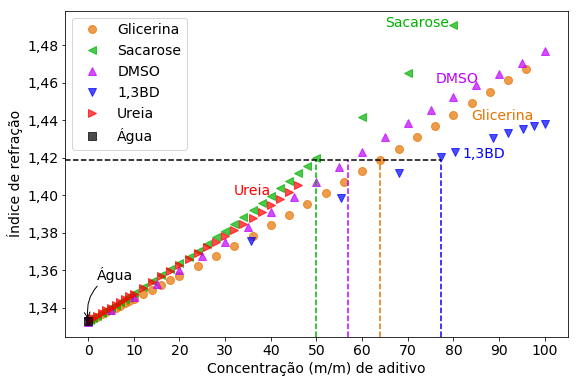

In [41]:
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})
fig, ax = plt.subplots(1, 1, figsize=(9,6))
for p, n in zip(ps, ns):
    if 'sucralose' in p:
        continue
    if 'Água' in p or 'Agua' in p:
        continue
    comp = p.split(' ')[0]
    ax.plot(ps[p], ns[n], markersize=def_markersize, linewidth=0, color=Cores[comp],
           marker=Simbolos[comp], label=dict_nomes[comp], alpha=0.7)

ax.plot(ps['Água p'], ns['Água n'], markersize=def_markersize, linewidth=0, color='k',
           marker='s', label='Água', alpha=0.7)


ax.set(xlabel='Concentração (m/m) de aditivo', ylabel='Índice de refração')
ax.set_xticks(np.arange(0, 110, 10))

match = 1.4189
concentration = 64.0

min_y, max_y = ax.get_ylim()
height_difference = max_y - min_y
match_difference = match - min_y
percentage = match_difference / height_difference

ax.axvline(x=64, ymax=percentage, linestyle='--', color=Cores['Glicerol'])  # Glicerina
ax.axvline(x=50, ymax=percentage, linestyle='--', color=Cores['Sacarose'])  # Sacarose
ax.axvline(x=57, ymax=percentage, linestyle='--', color=Cores['DMSO'])  # DMSO
#ax.axvline(x=64, ymax=percentage, linestyle='--', color='C0')  # Ureia
ax.axvline(x=77.19, ymax=percentage, linestyle='--', color=Cores['13BD'])  # 1,3BD

min_x, max_x = ax.get_xlim()
conc_difference = max_x - min_x
match_c_difference = 77.19 - min_x
percentage_c = match_c_difference / conc_difference
ax.axhline(y=match, xmax=percentage_c, linestyle='--', color='k')

ax.legend()
ax.text(84, 1.44, s='Glicerina', color=Cores['Glicerol'])
ax.text(65, 1.49, s='Sacarose', color=Cores['Sacarose'])
ax.text(76, 1.46, s='DMSO', color=Cores['DMSO'])
ax.text(82, 1.42, s='1,3BD', color=Cores['13BD'])
ax.text(32, 1.40, s='Ureia', color=Cores['Ureia'])
#ax.text(10, 1.335, s='Água', color='k')
ax.annotate(text='Água', xy=(ps.iloc[0,0], ns.iloc[0,0]), xytext=(2, 1.355),  
            arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3, rad=+.4' , 'color':'k'})

fig.savefig('../propriedades/indice_refracao.pdf')

# Cte dielétrica

In [28]:
cte_dieletrica = pd.read_excel(r'./dados experimentais/propriedades_aditivos.xlsx', sheet_name='eps', header=2)
cte_dieletrica.head()

,p Agua,eps Agua,p Ureia,eps Ureia,p Sacarose,eps Sacarose,p Glicerol,eps Glicerol,p DMSO,eps DMSO,p 13BD,eps 13BD
0,0.0,78.53,11.52,85.79875,10.0,78.04,10.0,77.55,7.75,77.75,4.8,76.41
1,NaN,NaN,20.31,89.89525,20.0,75.45,20.0,74.72,22.82,77.13,9.2,74.47
2,NaN,NaN,29.64,93.73625,30.0,72.64,30.0,71.77,37.13,76.25,11.3,73.56
3,NaN,NaN,36.83,96.42225,40.0,69.45,40.0,68.76,52.80,74.23,20.8,69.36
4,NaN,NaN,42.47,98.58800,50.0,65.88,50.0,65.63,70.60,69.70,28.8,65.65


In [29]:
p2_nomes = cte_dieletrica.columns[::2].tolist()
eps_nomes = cte_dieletrica.columns[1::2].tolist()
preferences = {'Agua':0, 'Glicerol':1, 'Sacarose':2, 'DMSO':3, '13BD':4, 'Ureia':5, 'sucralose':6}
    
def find_comp(string):
    return preferences[string.split(' ')[1]]

p2_nomes.sort(key = find_comp)
eps_nomes.sort(key = find_comp)

p2s = cte_dieletrica[p2_nomes]
epss = cte_dieletrica[eps_nomes]

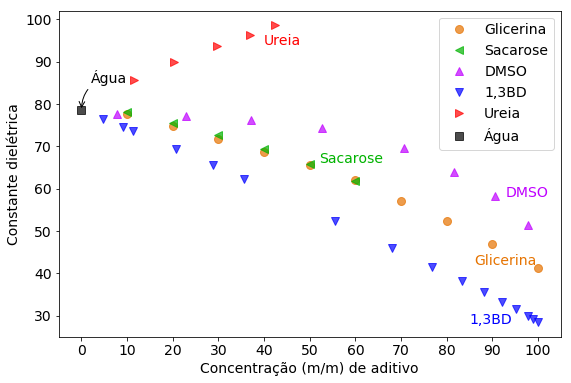

In [42]:

fig, ax = plt.subplots(1, 1, figsize=(9,6))
for p, eps in zip(p2s, epss):
    if 'Água' in p or 'Agua' in p:
        continue
    comp = p.split(' ')[1]
    ax.plot(p2s[p], epss[eps], markersize=def_markersize, linewidth=0, color=Cores[comp],
           marker=Simbolos[comp], label=dict_nomes[comp], alpha=0.7)

ax.plot(p2s['p Agua'], epss['eps Agua'], markersize=def_markersize, linewidth=0, color='k',
           marker='s', label='Água', alpha=0.7)

ax.set_xticks(np.arange(0, 110, 10))

ax.set(xlabel='Concentração (m/m) de aditivo', ylabel='Constante dielétrica')

ax.legend()
ax.text(86, 42, s='Glicerina', color=Cores['Glicerol'])
ax.text(52, 66, s='Sacarose', color=Cores['Sacarose'])
ax.text(93, 58, s='DMSO', color=Cores['DMSO'])
ax.text(85, 28, s='1,3BD', color=Cores['13BD'])
ax.text(40, 94, s='Ureia', color=Cores['Ureia'])
ax.annotate(text='Água', xy=(p2s.iloc[0,0], epss.iloc[0,0]), xytext=(2, 85),  
            arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3, rad=+.4' , 'color':'k'})

fig.savefig(r'../propriedades/cte_dieletrica.pdf')

# Param Gordon

In [20]:
param_G = pd.read_excel(r'./dados experimentais/propriedades_aditivos.xlsx', sheet_name='G', header=2)
param_G.head()

,Ureia p,Ureia G,Ureia err,Glicerol p,Glicerol G,Glicerol err,Sacarose p,Sacarose G,Sacarose err,DMSO p,DMSO G,DMSO err,13BD p,13BD G,13BD err,Água p,Água G,Água err
0,5.0,2.727308,0.010592,5,2.749596,0.010755,5,2.768773,0.011873,5.0,2.639504,0.010916,5.0,2.442826,0.016039,0.0,2.776989,0.015656
1,15.0,2.700446,0.006073,15,2.650084,0.007114,15,2.746373,0.010808,15.0,2.443352,0.004047,15.0,2.108681,0.003323,NaN,NaN,NaN
2,25.0,2.624275,0.029597,25,2.567377,0.009590,25,2.777409,0.007374,25.0,2.293466,0.004490,25.0,1.898990,0.003421,NaN,NaN,NaN
3,35.0,2.653180,0.014398,35,2.408923,0.031748,35,2.768757,0.024850,35.0,2.156071,0.005472,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,45,2.359128,0.005539,45,2.768397,0.008282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
p3_nomes = param_G.columns[::3].tolist()
G_nomes = param_G.columns[1::3].tolist()
Gerr_nomes = param_G.columns[2::3].tolist()
preferences = {'Água':0, 'Glicerol':1, 'Sacarose':2, 'DMSO':3, '13BD':4, 'Ureia':5, 'sucralose':6}
    
def find_comp(string):
    return preferences[string.split(' ')[0]]

p3_nomes.sort(key = find_comp)
G_nomes.sort(key = find_comp)
Gerr_nomes.sort(key = find_comp)

p3s = param_G[p3_nomes]
Gs = param_G[G_nomes]
Gerrs = param_G[Gerr_nomes]

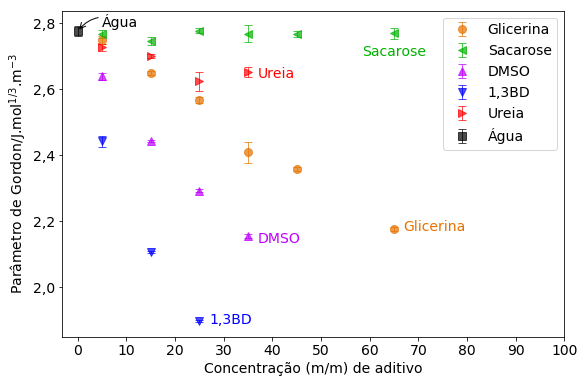

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(9,6))
capsize = 4
elinewidth=1
capthick=1

for p, G, Gerr in zip(p3s, Gs, Gerrs):
    if 'Água' in p or 'Agua' in p:
        continue
    comp = p.split(' ')[0]
    ax.errorbar(p3s[p], Gs[G], yerr=Gerrs[Gerr], 
                markersize=def_markersize, linewidth=0, color=Cores[comp],
                marker=Simbolos[comp], label=dict_nomes[comp], elinewidth=elinewidth, capsize=capsize, alpha=0.7,
               capthick=capthick)

ax.errorbar(p3s['Água p'], Gs['Água G'], yerr=Gerrs['Água err'],
            markersize=def_markersize, linewidth=0, color='k',
            marker='s', label='Água', elinewidth=elinewidth, capsize=capsize, alpha=0.7, capthick=capthick)

ax.set_xticks(np.arange(0, 110, 10))

ax.set(xlabel='Concentração (m/m) de aditivo', ylabel='Parâmetro de Gordon/J.mol$^{1/3}$.m$^{-3}$')

ax.legend()
ax.text(67, 2.17, s='Glicerina', color=Cores['Glicerol'])
ax.text(65, 2.7, s='Sacarose', color=Cores['Sacarose'], ha='center')
ax.text(37, 2.135, s='DMSO', color=Cores['DMSO'])
ax.text(27, 1.89, s='1,3BD', color=Cores['13BD'])
ax.text(37, 2.635, s='Ureia', color=Cores['Ureia'])
ax.annotate(text='Água', xy=(p3s.iloc[0,0], Gs.iloc[0,0]), xytext=(5, 2.79),  
            arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3, rad=+.4' , 'color':'k'})

fig.savefig(r'../propriedades/param_gordon.pdf')

# Tensão superficial

In [69]:
tensao = pd.read_excel(r'./dados experimentais/propriedades_aditivos.xlsx', sheet_name='Tens', header=2)
tensao.head()

,Ureia p,Ureia TS,Ureia Err,Glicerol p,Glicerol TS,Glicerol Err,Sacarose p,Sacarose TS,Sacarose Err,DMSO p,DMSO TS,DMSO Err,13BD p,13BD TS,13BD Err,Água p,Água TS,Água Err
0,5.0,72.105632,0.280024,5,72.860452,0.285003,5,72.832528,0.312310,5.0,70.115288,0.289966,5.0,64.722803,0.424966,0.0,72.841853,0.410658
1,15.0,72.587736,0.163246,15,71.818147,0.192780,15,72.708270,0.286130,15.0,66.605784,0.110321,15.0,57.175388,0.090095,NaN,NaN,NaN
2,25.0,71.862282,0.810478,25,71.291806,0.266312,25,74.122389,0.196797,25.0,64.272946,0.125819,25.0,52.767825,0.095050,NaN,NaN,NaN
3,35.0,74.197394,0.402644,35,68.230957,0.984974,35,74.628051,0.669797,35.0,62.281004,0.158061,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,45,69.592758,0.163404,45,75.555133,0.226042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
p4_nomes = tensao.columns[::3].tolist()
TS_nomes = tensao.columns[1::3].tolist()
TSerr_nomes = tensao.columns[2::3].tolist()
preferences = {'Água':0, 'Glicerol':1, 'Sacarose':2, 'DMSO':3, '13BD':4, 'Ureia':5, 'sucralose':6}
    
def find_comp(string):
    return preferences[string.split(' ')[0]]

p4_nomes.sort(key = find_comp)
TS_nomes.sort(key = find_comp)
TSerr_nomes.sort(key = find_comp)

p4s = tensao[p4_nomes]
TSs = tensao[TS_nomes]
TSerrs = tensao[TSerr_nomes]

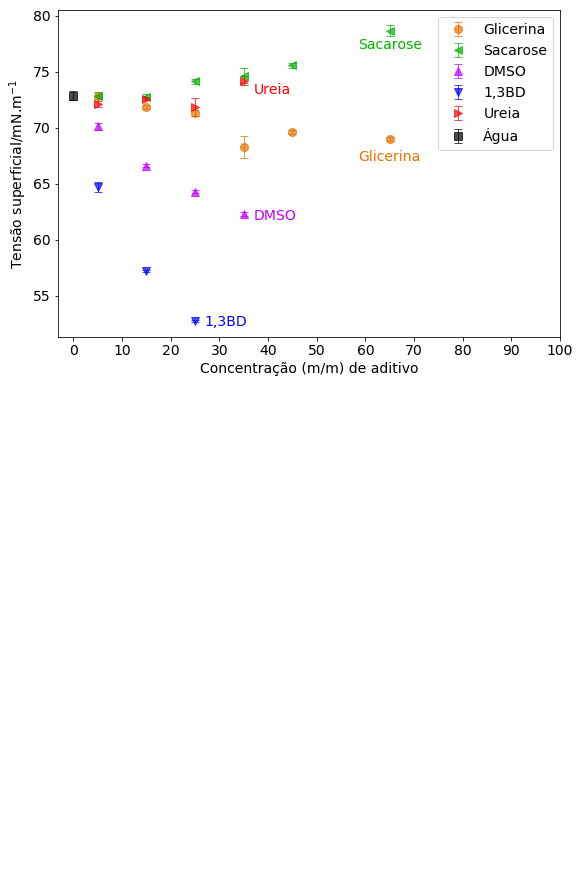

In [94]:
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})
fig, ax = plt.subplots(1, 1, figsize=(9,6))
capsize = 4
elinewidth=1
capthick=1

for p, TS, TSerr in zip(p3s, TSs, TSerrs):
    if 'Água' in p or 'Agua' in p:
        continue
    comp = p.split(' ')[0]
    ax.errorbar(p4s[p], TSs[TS], yerr=TSerrs[TSerr], 
                markersize=def_markersize, linewidth=0, color=Cores[comp],
                marker=Simbolos[comp], label=dict_nomes[comp], elinewidth=elinewidth, capsize=capsize, alpha=0.7,
               capthick=capthick)

ax.errorbar(p4s['Água p'], TSs['Água TS'], yerr=TSerrs['Água Err'],
            markersize=def_markersize, linewidth=0, color='k',
            marker='s', label='Água', elinewidth=elinewidth, capsize=capsize, alpha=0.7, capthick=capthick)

ax.set_xticks(np.arange(0, 110, 10))

ax.set(xlabel='Concentração (m/m) de aditivo', ylabel='Tensão superficial/mN.m$^{-1}$')

ax.legend()
ax.text(65, 67, s='Glicerina', color=Cores['Glicerol'], ha='center')
ax.text(65, 77, s='Sacarose', color=Cores['Sacarose'], ha='center')
ax.text(37, 61.8, s='DMSO', color=Cores['DMSO'])
ax.text(27, 52.3, s='1,3BD', color=Cores['13BD'])
ax.text(37, 73, s='Ureia', color=Cores['Ureia'])
ax.annotate(text='Água', xy=(p3s.iloc[0,0], Gs.iloc[0,0]), xytext=(5, 2.79),  
            arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3, rad=+.4' , 'color':'k'})

fig.savefig(r'../propriedades/tensao_superficial.pdf')